# K Nearest Neighbors

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
df=pd.read_csv('Classified Data',index_col=0)

In [118]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [119]:
df.drop(['TARGET CLASS'],axis=1)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


# Standardize the Variable

In [120]:
#Standardize of columns with StandardScaler
from sklearn.preprocessing import StandardScaler

In [121]:
scaler=StandardScaler()

In [122]:
scaler.fit(df)

StandardScaler()

In [123]:
scaled_features=scaler.transform(df)

In [124]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -0.9497194 ,
        -0.64331425,  1.        ],
       [-1.08483602, -0.43034845, -1.02531333, ..., -1.82805088,
         0.63675862, -1.        ],
       [-0.78870217,  0.33931821,  0.30151137, ..., -0.68249379,
        -0.37784986, -1.        ],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -0.81426092,
         0.11159651,  1.        ],
       [ 0.46707241, -0.98278576, -1.46519359, ...,  0.40602453,
        -0.85567   ,  1.        ],
       [-0.38765353, -0.59589427, -1.4313981 , ...,  0.3369971 ,
         0.01034996,  1.        ]])

In [125]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns)

In [126]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314,1.0
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759,-1.0
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850,-1.0
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987,1.0
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510,1.0


In [128]:
df_feat.drop(['TARGET CLASS'],axis=1,inplace=True)

In [139]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Now data is ready for puting in Machine Learning 

# Train Test Split

In [129]:
X=df_feat
y=df['TARGET CLASS']

In [130]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.3,random_state=101)

# Using KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn=KNeighborsClassifier(n_neighbors=1)

In [151]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [152]:
pred=knn.predict(X_test)

# Prediction and Evaluation of the Model

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

In [154]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [155]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [161]:
#use elbow method for choosing a correct value for K
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Eroor')

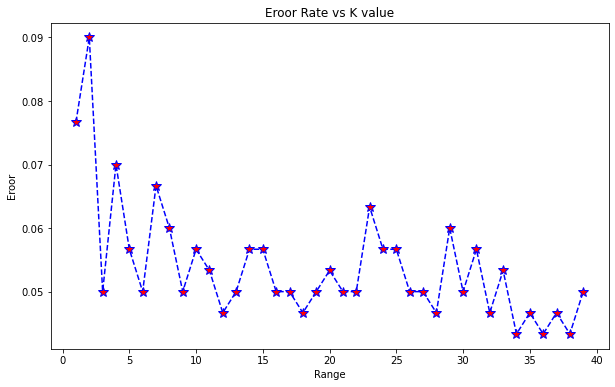

In [169]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='*',markerfacecolor='red',markersize=10)
plt.title('Eroor Rate vs K value')
plt.xlabel('Range')
plt.ylabel('Eroor')

In [173]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('WITH K=17')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=17
[[153   6]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [174]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

print('WITH K=34')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

WITH K=34
[[153   6]
 [  7 134]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

